# Import Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from constants import CLEANED_TEST_DATA_PATH, ENCODED_TEST_DATA_PATH

# Prepare Data

## Load Data

In [4]:
df = pd.read_csv(".." / CLEANED_TEST_DATA_PATH)

In [5]:
def detect_lang(text: str) -> str:
        if pd.isna(text): return 'unknown'
        arabic_ratio = len(re.findall(r'[\u0600-\u06FF]', text)) / max(len(re.findall(r'[a-zA-Z\u0600-\u06FF]', text)), 1)
        return 'arabic' if arabic_ratio >= 0.5 else 'english'

In [6]:
df['language'] = df['Item_Name'].astype(str).apply(detect_lang)
df['language'].value_counts()

language
arabic     3290
english    1268
Name: count, dtype: int64

## Plots

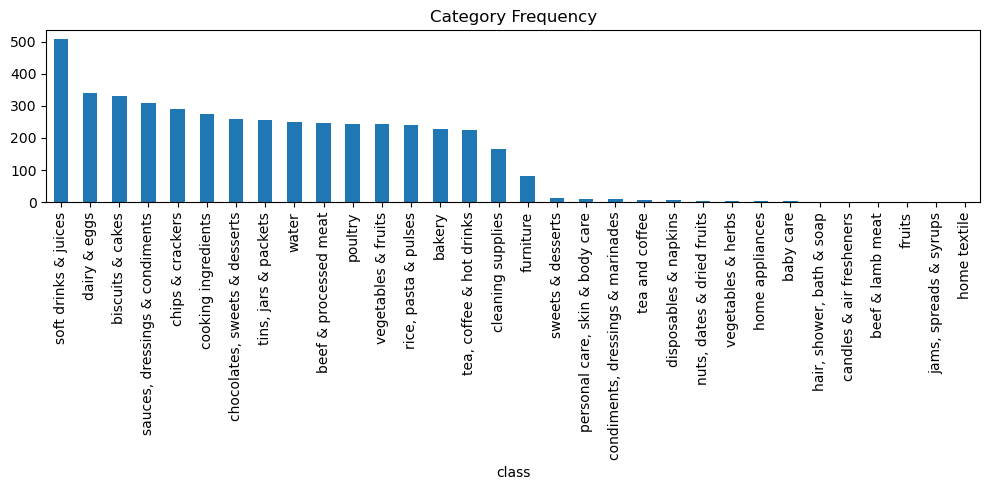

In [22]:
df['class'].value_counts().plot(kind='bar', figsize=(10, 5), title='Category Frequency')
plt.xticks()
plt.tight_layout()
plt.show()

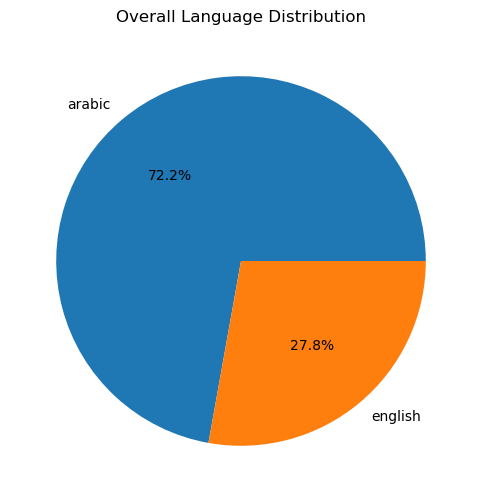

In [9]:
df['language'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Overall Language Distribution')
plt.ylabel("")
plt.show()

In [11]:
lang_cat_df = df.groupby('class')['language'].value_counts().unstack(fill_value=0)

# Optional: sort by total for better visualization
lang_cat_df = lang_cat_df[['arabic', 'english', 'mixed', 'unknown']] \
    if set(['mixed', 'unknown']).issubset(lang_cat_df.columns) else lang_cat_df[['arabic', 'english']]

lang_cat_df = lang_cat_df.sort_values(by='arabic' if 'arabic' in lang_cat_df else lang_cat_df.columns[0], ascending=False)

<Figure size 1400x700 with 0 Axes>

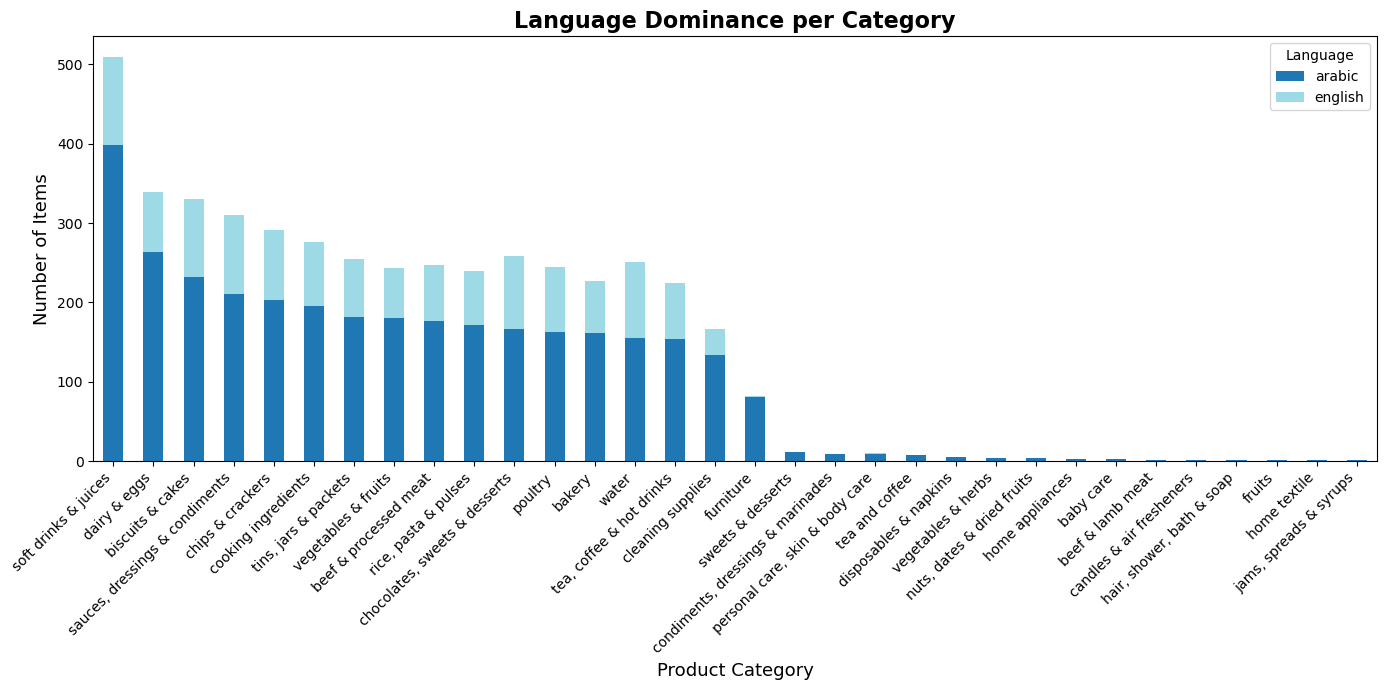

In [12]:
plt.figure(figsize=(14, 7))
lang_cat_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 7))

plt.title('Language Dominance per Category', fontsize=16, weight='bold')
plt.xlabel('Product Category', fontsize=13)
plt.ylabel('Number of Items', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language')
plt.tight_layout()
plt.show()